# Data Science Challenge - Mercado Libre

## ⚡ 1. EDA – Lightning Offers

We begin by exploring the dataset to understand its structure, contents, and basic statistics. This initial exploratory data analysis (EDA) includes checking the number of rows and columns, data types, missing values, and key categorical fields.

### 🧾 Dataset Overview

- **Shape**: 48,746 rows × 13 columns  
- **Memory usage**: ~4.8 MB  
- **Offer type**: Only contains `'lightning_deal'`  
- **Time period covered**:  
  - **Min date**: 2021-06-01  
  - **Max date**: 2021-07-31

### 📊 Column Summary

| Column                       | Non-null Count | Dtype   | Description |
|-----------------------------|----------------|---------|-------------|
| OFFER_START_DATE            | 48,746         | object  | Start date of the offer (date only) |
| OFFER_START_DTTM            | 48,746         | object  | Start datetime of the offer |
| OFFER_FINISH_DTTM           | 48,746         | object  | End datetime of the offer |
| OFFER_TYPE                  | 48,746         | object  | Type of offer – only "lightning_deal" in this dataset |
| INVOLVED_STOCK              | 48,746         | int64   | Quantity of stock involved in the offer |
| REMAINING_STOCK_AFTER_END  | 48,746         | int64   | Remaining stock after the deal ended |
| SOLD_AMOUNT                 | 24,579         | float64 | Total amount sold during the deal |
| SOLD_QUANTITY               | 24,579         | float64 | Number of units sold during the deal |
| ORIGIN                      | 11,316         | object  | Source of the offer (only 'A' or missing) |
| SHIPPING_PAYMENT_TYPE       | 48,746         | object  | Indicates whether shipping was paid or free |
| DOM_DOMAIN_AGG1             | 48,746         | object  | General product category |
| VERTICAL                    | 48,746         | object  | Business vertical |
| DOMAIN_ID                   | 48,746         | object  | Specific product domain identifier |

### 🧩 Categorical Fields – Sample Values

- **`OFFER_TYPE`**: `['lightning_deal']`  
- **`ORIGIN`**: `['A', NaN]`  
- **`SHIPPING_PAYMENT_TYPE`**: `['none', 'free_shipping']`  
- **`DOM_DOMAIN_AGG1`**:  
  `['PETS FOOD', 'PET PRODUCTS', 'COMPUTERS', 'ELECTRONICS', 'APPAREL', 'PARTY', 'TOYS AND GAMES', 'PERSONAL CARE', 'INDUSTRY', 'TOOLS AND CONSTRUCTION']`

- **`VERTICAL`**:  
  `['CPG', 'OTHERS', 'CE', 'APP & SPORTS', 'T & B', 'BEAUTY & HEALTH', 'HOME & INDUSTRY', 'ENTERTAINMENT', 'ACC']`

- **`DOMAIN_ID`** (Examples):  
  `['MLM-BIRD_FOODS', 'MLM-ANIMAL_AND_PET_PRODUCTS', 'MLM-SPEAKERS', 'MLM-HEADPHONES', 'MLM-SMART_SPEAKERS']`

---

This initial analysis helps to identify the main structure of the dataset and guides the next steps in data cleaning, transformation, and visualization.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Load the ofertas_relampago DataFrame from a CSV file
ofertas_relampago = pd.read_csv('ofertas_relampago.csv')

# Copy the DataFrame to ofertas
ofertas = ofertas_relampago.copy()  
# Dataset overview
print(ofertas.info())
print('--------------------------------------------------')
ofertas.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS


In [4]:
# Overview on the categorical columns
categorical_cols = ofertas[['OFFER_TYPE','ORIGIN','SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1','VERTICAL','DOMAIN_ID']]
for col in categorical_cols:
    print(f"{col}: {ofertas[col].unique()[:10]}")  # Show the first 10 unique values of each categorical column

OFFER_TYPE: ['lightning_deal']
ORIGIN: ['A' nan]
SHIPPING_PAYMENT_TYPE: ['none' 'free_shipping']
DOM_DOMAIN_AGG1: ['PETS FOOD' 'PET PRODUCTS' 'COMPUTERS' 'ELECTRONICS' 'APPAREL' 'PARTY'
 'TOYS AND GAMES' 'PERSONAL CARE' 'INDUSTRY' 'TOOLS AND CONSTRUCTION']
VERTICAL: ['CPG' 'OTHERS' 'CE' 'APP & SPORTS' 'T & B' 'BEAUTY & HEALTH'
 'HOME & INDUSTRY' 'ENTERTAINMENT' 'ACC']
DOMAIN_ID: ['MLM-BIRD_FOODS' 'MLM-ANIMAL_AND_PET_PRODUCTS' 'MLM-SPEAKERS'
 'MLM-HEADPHONES' 'MLM-SMART_SPEAKERS' 'MLM-ELECTRONIC_PRODUCTS'
 'MLM-CATS_AND_DOGS_FOODS' 'MLM-CLOTHING' 'MLM-PARTY_SUPPLIES'
 'MLM-TOYS_AND_GAMES']


In [5]:
# Period of the dataset
print("Min date:", ofertas["OFFER_START_DATE"].min())
print("Max date:", ofertas["OFFER_START_DATE"].max())

Min date: 2021-06-01
Max date: 2021-07-31


## 🧹 Preprocessing and Feature Engineering

The code below performs a series of preprocessing steps and creates new columns based on the `ofertas` DataFrame.

- The date-related columns are converted to the pandas `datetime` format to enable time-based calculations.
- To avoid errors in numeric operations and ensure consistency, missing values in the sales-related columns are filled with zero.
- In addition, the `"none"` values in the shipping type column are replaced with `"regular"`.

New columns are also created to enrich the analysis:

- **`DURATION_HOURS`**: the offer duration in hours.  
- **`SOLD_RATIO`**: the proportion of the involved stock that was sold.  
- **`PRICE_PER_UNIT`**: the average unit price (total sold amount divided by quantity sold).  
- **`DAY_OF_WEEK`**: the day of the week when the offer started.
- **`DURATION_CATEGORY`**: categorization of the duration hours


In [6]:
# Convert date columns to datetime format
ofertas["OFFER_START_DATE"] = pd.to_datetime(ofertas["OFFER_START_DATE"])
ofertas["OFFER_START_DTTM"] = pd.to_datetime(ofertas["OFFER_START_DTTM"])
ofertas["OFFER_FINISH_DTTM"] = pd.to_datetime(ofertas["OFFER_FINISH_DTTM"])
# Fill nan with zeros on columns sold_quantity and sold_amount
ofertas["SOLD_QUANTITY"] = ofertas["SOLD_QUANTITY"].fillna(0)
ofertas["SOLD_AMOUNT"] = ofertas["SOLD_AMOUNT"].fillna(0)
# Fill SHIPPING_PAYMENT_TYPE with 'Regular' where it is 'none'
ofertas["SHIPPING_PAYMENT_TYPE"] = ofertas["SHIPPING_PAYMENT_TYPE"].replace("none", 'regular')
# Creating new columns based on existing ones
# Calculate the offer duration in hours by subtracting start from finish timestamp
ofertas["DURATION_HOURS"] = (ofertas["OFFER_FINISH_DTTM"] - ofertas["OFFER_START_DTTM"]).dt.total_seconds() / 3600
# Calculate the sold ratio: how much was sold relative to the initial stock
ofertas["SOLD_RATIO"] = ofertas["SOLD_QUANTITY"] / ofertas["INVOLVED_STOCK"]
# Calculate the price per unit sold
ofertas["PRICE_PER_UNIT"] = ofertas["SOLD_AMOUNT"] / ofertas["SOLD_QUANTITY"]
# Extract the day of the week from the offer start datetime
ofertas["DAY_OF_WEEK"] = ofertas["OFFER_START_DTTM"].dt.day_name()
# Categorize offers based on duration into fixed time intervals
ofertas["DURATION_CATEGORY"] = pd.cut(
    ofertas["DURATION_HOURS"],
    bins=[0, 6, 12, 24, 48, float('inf')],  # Define the time ranges
    labels=["<6h", "6-12h", "12-24h", "24-48h", ">48h"]  # Label each bin
)
# Create a new price category based on quartiles (4 groups with equal number of observations)
ofertas['PRICE_CATEGORY'] = pd.qcut(
    ofertas['PRICE_PER_UNIT'],
    q=4,  # Divide into 4 quantiles
    labels=['low', 'medium-low', 'medium-high', 'high']  # Label each price group
)

ofertas.head(1)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,DURATION_HOURS,SOLD_RATIO,PRICE_PER_UNIT,DAY_OF_WEEK,DURATION_CATEGORY,PRICE_CATEGORY
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,regular,PETS FOOD,CPG,MLM-BIRD_FOODS,7.045278,1.5,0.786667,Tuesday,6-12h,low


## ⏳ Offer Duration Analysis

The analysis of offer durations reveals key insights into how long deals typically last on the platform:

- Most deals last **less than 24 hours**, which can be clearly observed in the histogram.
- The distribution of offer durations is **right-skewed**, with a high concentration of short-term deals and a few outliers with extended durations.
- While some offers remain active for several days, **these cases are rare** and do not represent the general behavior.

**Descriptive statistics:**

- **Mean duration:** 5.71 hours  
- **Median duration:** 6.00 hours  
- **Standard deviation:** 2.11 hours  
- **Minimum duration:** 0.00 hours  
- **Maximum duration:** 104.75 hours  

This suggests that most offers are designed to create a sense of urgency, encouraging customers to act quickly before the deal expires.

---


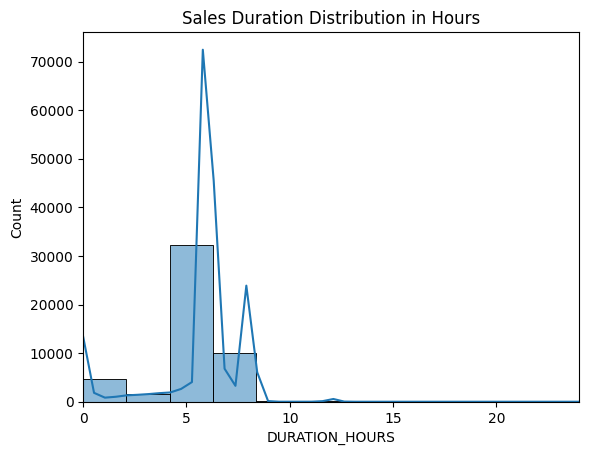

In [7]:
sns.histplot(ofertas["DURATION_HOURS"], bins=50, kde=True)
plt.title("Sales Duration Distribution in Hours")
plt.xlim(0, 24)
plt.show()

In [8]:
# Analysis of the sales duration distribution in hours
duration_mean = ofertas["DURATION_HOURS"].mean()
duration_median = ofertas["DURATION_HOURS"].median()
duration_std = ofertas["DURATION_HOURS"].std()
duration_min = ofertas["DURATION_HOURS"].min()
duration_max = ofertas["DURATION_HOURS"].max()

print(f"Mean duration: {duration_mean:.2f} hours")
print(f"Median duration: {duration_median:.2f} hours")
print(f"Standard deviation: {duration_std:.2f} hours")
print(f"Minimum duration: {duration_min:.2f} hours")
print(f"Maximum duration: {duration_max:.2f} hours")

Mean duration: 5.71 hours
Median duration: 6.00 hours
Standard deviation: 2.11 hours
Minimum duration: 0.00 hours
Maximum duration: 104.75 hours



### 📊 Distribution of Offers by Duration Category

To better understand how offers are distributed across time ranges, we categorized durations as follows:  
`<6h`, `6–12h`, `12–24h`, `24–48h`, and `>48h`.

The results are shown in the chart below:

- `6–12h` is by far the most common category, with **34,483** offers.
- The `<6h` category follows with **12,774** offers.
- Longer durations (`>12h`) are **extremely rare**, with only a handful of occurrences:
  - `12–24h`: 174 offers  
  - `24–48h`: 0 offers  
  - `>48h`: 1 offer

📌 **Insight**: Nearly all offers are concentrated in the **shortest duration buckets**, especially under 12 hours. This reinforces the platform’s emphasis on urgency and limited-time deals.

You can now complement this with conversion analysis by duration category to see whether extending or reducing duration improves performance.


DURATION_CATEGORY
<6h       12774
6-12h     34483
12-24h      174
24-48h        0
>48h          1
Name: count, dtype: int64


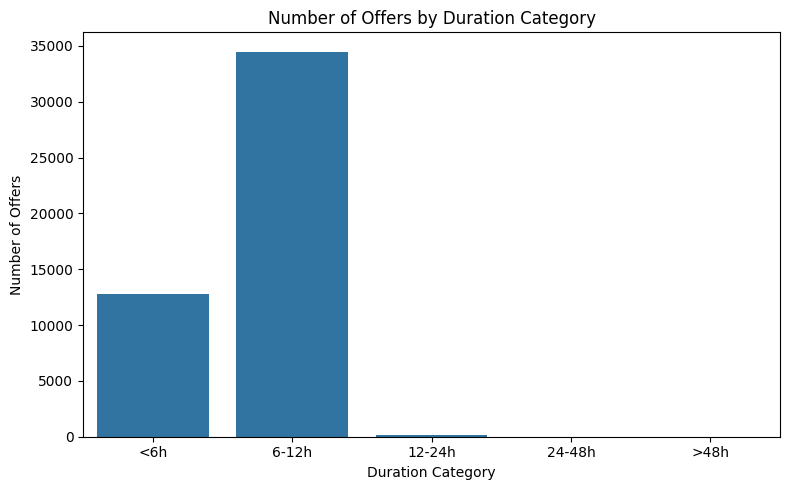

In [9]:
# Count the number of offers in each duration category
duration_counts = ofertas["DURATION_CATEGORY"].value_counts().sort_index()
print(duration_counts)

# Plot the count of offers by duration category
plt.figure(figsize=(8, 5))
sns.countplot(data=ofertas, x="DURATION_CATEGORY", order=["<6h", "6-12h", "12-24h", "24-48h", ">48h"])
plt.title("Number of Offers by Duration Category")
plt.xlabel("Duration Category")
plt.ylabel("Number of Offers")
plt.tight_layout()
plt.show()


## 📈 Sold Ratio Distribution

The histogram below illustrates the distribution of the `SOLD_RATIO` — the proportion of stock sold relative to the stock involved in each deal.

- The distribution is **heavily right-skewed**, with the vast majority of deals having a low `SOLD_RATIO`.
- A small number of records show values **greater than 1**, indicating that some offers were **oversold**, which is not expected behavior.
- This could be due to **data quality issues**, **delays in stock updates**, or **errors in inventory tracking systems**.

### 📊 Summary Statistics

- **Mean SOLD_RATIO:** 20.67%  
- **Median SOLD_RATIO:** 1.00%  
- **Standard deviation:** 35.32%  
- **Minimum:** 0.00%  
- **Maximum:** 1380.00%

### ⚠️ Anomalies

- **Deals with overselling (SOLD_RATIO > 100%):** 1,239 (2.54% of total)  
- **Deals with zero sales (SOLD_RATIO = 0):** 24,167 (49.58% of total)

These anomalies are important:

- **Overselling deals** should be investigated to ensure the integrity of stock management.
- **Zero-sales deals** represent almost **half of the dataset**, which may indicate:
  - Poor deal attractiveness (e.g., price, product type, visibility)
  - Very short deal duration
  - Stock never actually became available for sale
  - Or simply deals that were ignored by consumers

These cases may **skew the modeling** or performance metrics if not treated carefully, especially in predictive tasks (e.g., forecasting sales success or optimizing stock levels).


Text(0.5, 1.0, 'Distribution of SOLD_RATIO')

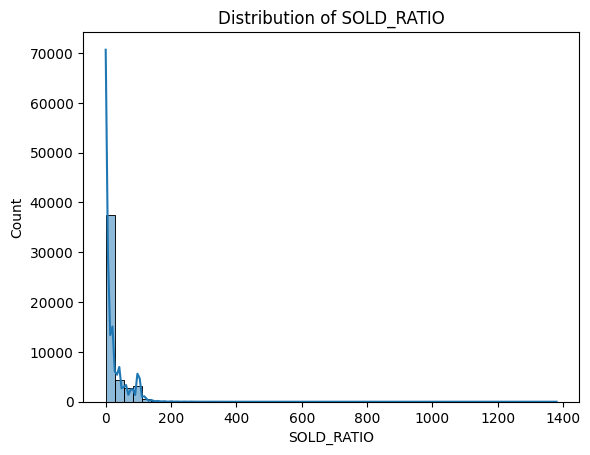

In [10]:
sns.histplot(ofertas["SOLD_RATIO"]*100, bins=50, kde=True)
plt.title("Distribution of SOLD_RATIO")

In [11]:
# Basic statistics
sold_ratio_mean = ofertas["SOLD_RATIO"].mean()
sold_ratio_median = ofertas["SOLD_RATIO"].median()
sold_ratio_std = ofertas["SOLD_RATIO"].std()
sold_ratio_min = ofertas["SOLD_RATIO"].min()
sold_ratio_max = ofertas["SOLD_RATIO"].max()

print("SOLD_RATIO Statistics:")
print(f"- Mean: {sold_ratio_mean * 100:.2f} %")
print(f"- Median: {sold_ratio_median * 100:.2f} %")
print(f"- Standard deviation: {sold_ratio_std * 100:.2f} %")
print(f"- Minimum: {sold_ratio_min * 100:.2f} %")
print(f"- Maximum: {sold_ratio_max * 100:.2f} %")

# Overselling (SOLD_RATIO > 1)
overselling_count = (ofertas["SOLD_RATIO"] > 1).sum()
overselling_pct = overselling_count / len(ofertas) * 100
print(f"Deals with overselling (SOLD_RATIO > 1): {overselling_count} ({overselling_pct:.2f}%)")

# Zero sales (SOLD_RATIO == 0)
zero_sales_count = (ofertas["SOLD_RATIO"] == 0).sum()
zero_sales_pct = zero_sales_count / len(ofertas) * 100
print(f"Deals with zero sales (SOLD_RATIO == 0): {zero_sales_count} ({zero_sales_pct:.2f}%)")


SOLD_RATIO Statistics:
- Mean: 20.67 %
- Median: 1.00 %
- Standard deviation: 35.32 %
- Minimum: 0.00 %
- Maximum: 1380.00 %
Deals with overselling (SOLD_RATIO > 1): 1239 (2.54%)
Deals with zero sales (SOLD_RATIO == 0): 24167 (49.58%)


## 🛍️ Top-Selling Product Categories

The bar chart below displays the **top 10 product verticals** by total sales (`SOLD_AMOUNT`). This visualization helps identify which broad product groups contributed most to overall revenue.

### 🔝 Insights from the Bar Chart:

- **BEAUTY & HEALTH** is the leading vertical, significantly outperforming others in terms of sold amount.
- It is followed by **CE (Consumer Electronics)** and **HOME & INDUSTRY**, which also represent substantial sales volume.
- Verticals such as **ENTERTAINMENT** and **OTHERS** appear with minimal sales, suggesting low traction or niche markets.

This ranking can be useful for focusing marketing efforts or inventory planning on high-performing verticals.

---

## 🧭 Sales Distribution by Product Hierarchy

The treemap below breaks down the total `SOLD_AMOUNT` hierarchically using the structure:  
`VERTICAL > DOM_DOMAIN_AGG1 > DOMAIN_ID`.

This allows us to drill down into specific domains and categories within each vertical.

### 🧩 Insights from the Treemap:

- Within **BEAUTY & HEALTH**, the **PHARMACEUTICS** domain dominates, with a large share coming from **SURGICAL_AND_INDUSTRIAL_MASKS**.
- In **CE**, subdomains like **MOBILE** (especially **CELLPHONES**) and **ELECTRONICS** (e.g., **TELEVISIONS**) are the main revenue generators.
- **HOME & INDUSTRY** shows more fragmentation, with many smaller domains contributing to its total.
- Other verticals like **APP & SPORTS**, **ACC**, and **CPG** show more balanced distribution across various product subdomains.



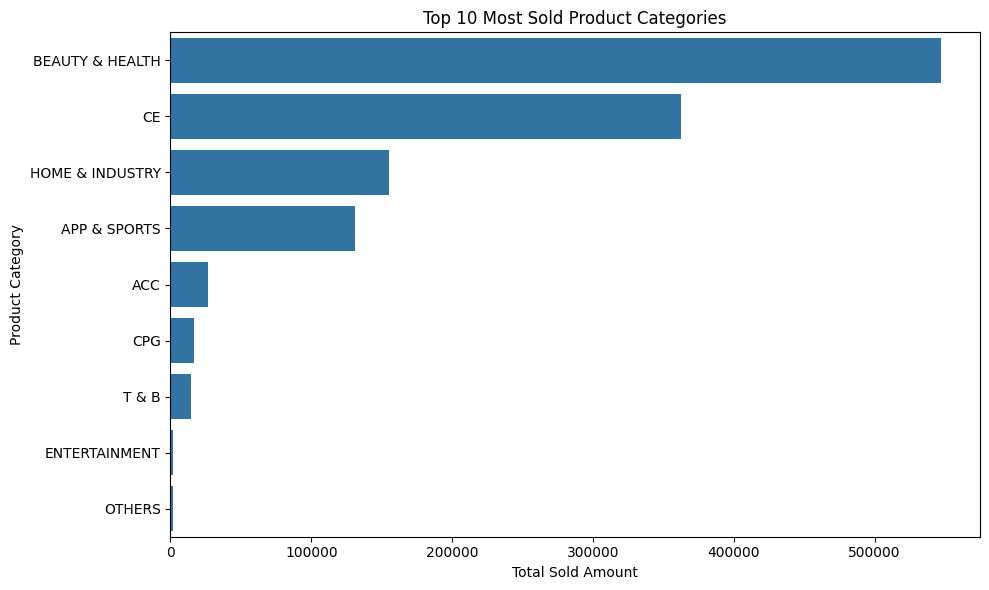

In [12]:
most_sold = (
    ofertas.groupby("VERTICAL")["SOLD_AMOUNT"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
most_sold = most_sold.reset_index().rename(columns={"index": "VERTICAL", "SOLD_AMOUNT": "SOLD_AMOUNT"})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=most_sold,
    y="VERTICAL",
    x="SOLD_AMOUNT"
)

plt.xlabel("Total Sold Amount")
plt.ylabel("Product Category")
plt.title("Top 10 Most Sold Product Categories")
plt.tight_layout()
plt.show()

import plotly.express as px

# Group the data by hierarchy and sum the sales
hierarchy_df = (
    ofertas.groupby(["VERTICAL", "DOM_DOMAIN_AGG1", "DOMAIN_ID"])["SOLD_AMOUNT"]
    .sum()
    .reset_index()
)

# Create the Treemap
fig = px.treemap(
    hierarchy_df,
    path=["VERTICAL", "DOM_DOMAIN_AGG1", "DOMAIN_ID"],
    values="SOLD_AMOUNT",
    color="SOLD_AMOUNT",
    color_continuous_scale="viridis",
    title="SOLD_AMOUNT by Hierarchy (VERTICAL > DOM_DOMAIN_AGG1 > DOMAIN_ID)"
)

fig.show()

## 🚚 Comparison of Shipping Modalities

This section analyzes how different shipping modalities — namely `Regular` and `Free Shipping` — relate to product sales and pricing.

---

### 📦 Total Sales by Shipping Type

A comparison of total `SOLD_AMOUNT` shows that:

- **Free Shipping** accounts for a significantly higher total amount sold compared to `Regular` shipping.
- This suggests that **offering free shipping may positively influence sales volume**, possibly due to its perceived added value by customers.

---

### 💰 Price per Unit Distribution by Shipping Type

Using a boxplot with a log scale, we observe the distribution of `PRICE_PER_UNIT` across shipping types:

- Products with **free shipping** tend to have **higher median prices per unit**.
- This could imply that:
  - The shipping cost is **embedded into the product price**, or
  - **Higher-priced items** are more likely to offer free shipping (e.g., electronics or premium goods).
- In contrast, products with **regular shipping** tend to have lower prices, possibly used as a strategy to **appear more competitively priced**, with shipping charged separately.

---

### 📊 Shipping Type Distribution by Product Category

In the stacked bar chart showing the **proportion of shipping types across product categories**, sorted by average price:

- Categories like **MOBILE**, **MULTIMEDIA**, and **ELECTRONICS** have a high proportion of free shipping, supporting the hypothesis that **high-value items often include shipping**.
- Conversely, categories like **FOODS**, **PERSONAL CARE**, and **BATTERIES** tend to rely more on **regular shipping**, possibly due to their lower margins or lower average prices.

---

### 🧮 Shipping Type vs. Price Category

When analyzing the distribution of shipping types across **unit price ranges** (`PRICE_CATEGORY`):

- **Free shipping dominates** in the **high** and **medium-high** price segments.
- **Regular shipping becomes prevalent** in the **medium-low** and **low** price tiers.
  
This reinforces the idea that **higher-priced products are more likely to include shipping**, while **cheaper items often separate the product and delivery cost**.

---

### ✅ Key Takeaways

- Offering **free shipping is correlated with higher total sales**, especially for higher-priced items.
- Businesses may consider **including shipping in the price** for premium segments to drive conversions.
- For **low-margin products**, keeping shipping separate might still be a strategic choice.


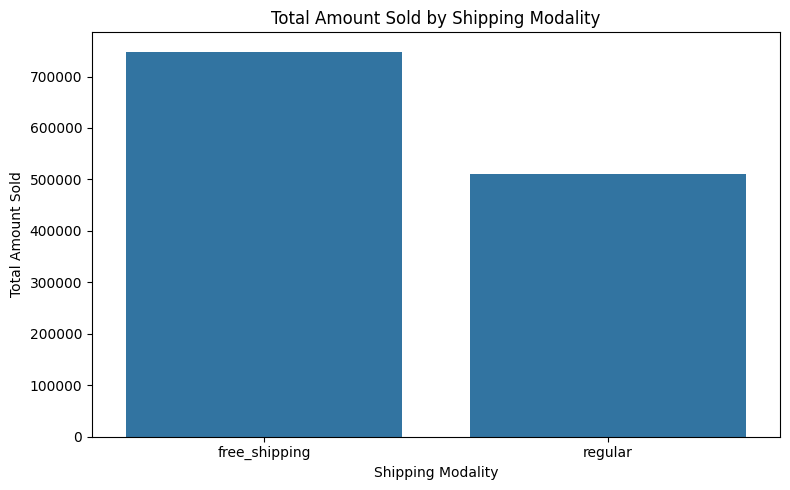

In [13]:
#Total Amount Sold by Shipping Modality
# Group by shipping modality and sum the SOLD_AMOUNT
sold_by_shipping = ofertas.groupby('SHIPPING_PAYMENT_TYPE')['SOLD_AMOUNT'].sum().reset_index()

# Plot the total amount sold by shipping modality
plt.figure(figsize=(8, 5))
sns.barplot(data=sold_by_shipping, x='SHIPPING_PAYMENT_TYPE', y='SOLD_AMOUNT')
plt.title('Total Amount Sold by Shipping Modality')
plt.xlabel('Shipping Modality')
plt.ylabel('Total Amount Sold')
plt.tight_layout()
plt.show()


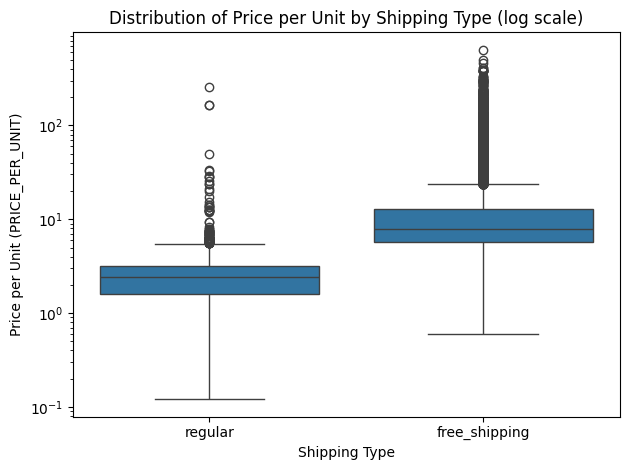

In [14]:
# Distribution of Price per Unit by Shipping Type (log scale)
sns.boxplot(data=ofertas, x='SHIPPING_PAYMENT_TYPE', y='PRICE_PER_UNIT')
plt.yscale('log')  # Useful if there are products with very different prices
plt.title('Distribution of Price per Unit by Shipping Type (log scale)')
plt.xlabel('Shipping Type')
plt.ylabel('Price per Unit (PRICE_PER_UNIT)')
plt.tight_layout()
plt.show()

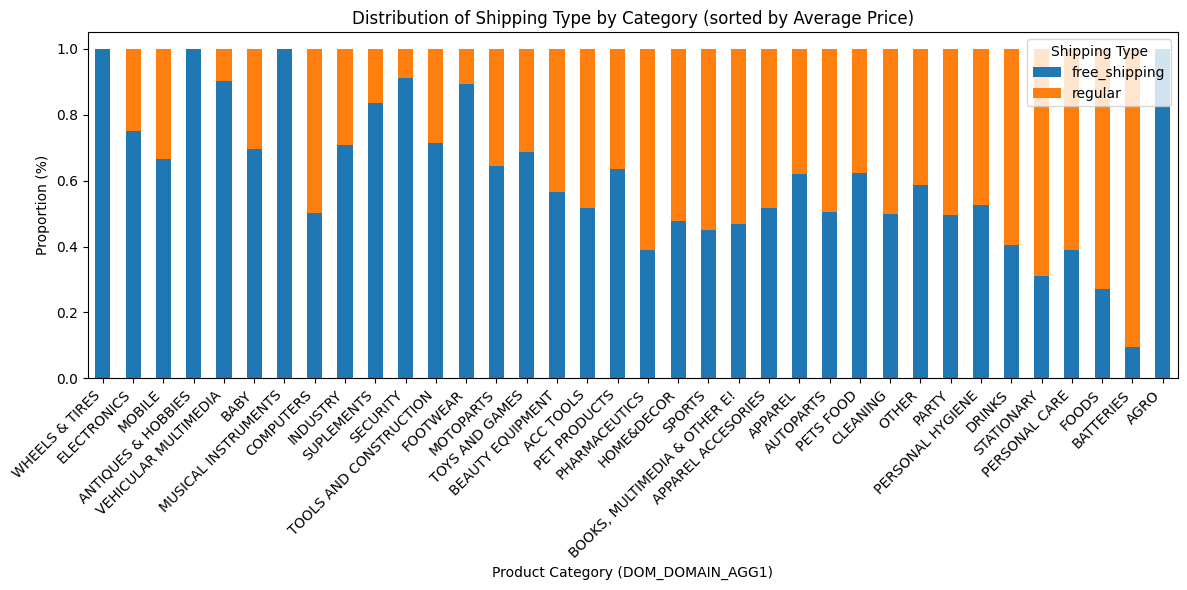

In [15]:
# Distribution of Shipping Type by Category (sorted by Average Price)
# 1. Calculate average price per unit by category
average_price = ofertas.groupby('DOM_DOMAIN_AGG1')['PRICE_PER_UNIT'].mean()

# 2. Calculate the proportion of each shipping type by category
shipping_by_category = pd.crosstab(
    ofertas['DOM_DOMAIN_AGG1'],
    ofertas['SHIPPING_PAYMENT_TYPE'],
    normalize='index'
)

# 3. Sort the data based on average price
sorted_shipping = shipping_by_category.loc[average_price.sort_values(ascending=False).index]

# 4. Plot the chart
sorted_shipping.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Shipping Type by Category (sorted by Average Price)')
plt.xlabel('Product Category (DOM_DOMAIN_AGG1)')
plt.ylabel('Proportion (%)')
plt.legend(title='Shipping Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


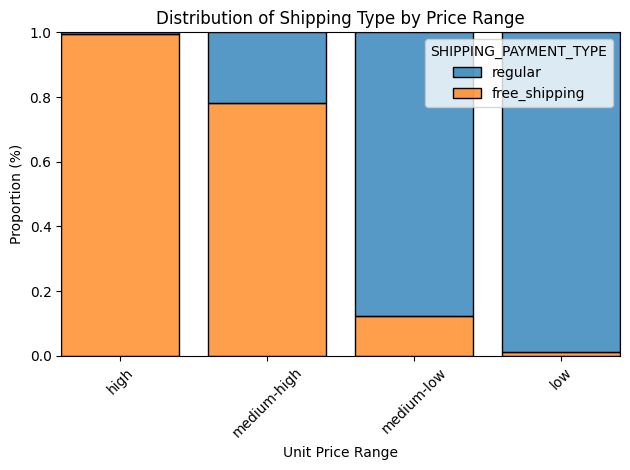

In [16]:
# Distribution of Shipping Type by Price Range

# 1. Convert to ordered categorical (optional, helps with sorting in plots)
ofertas['PRICE_CATEGORY'] = pd.Categorical(
    ofertas['PRICE_CATEGORY'],
    categories=['high', 'medium-high', 'medium-low', 'low'],
    ordered=True
)

# 2. Plot the distribution of shipping type by price range
sns.histplot(
    data=ofertas,
    x='PRICE_CATEGORY',
    hue='SHIPPING_PAYMENT_TYPE',
    multiple='fill',
    shrink=0.8,
    stat='probability'
)

plt.title('Distribution of Shipping Type by Price Range')
plt.xlabel('Unit Price Range')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📊 Analysis of Offer Effectiveness by Product Category

We observed a significant portion of offers with no recorded sales. This is an important metric, as it may indicate:

- ⚠️ **Low product attractiveness**
- ⚠️ **Ineffective pricing**
- ⚠️ **Insufficient visibility during the offer**
- ⚠️ **Operational issues** (e.g., stock not available at the time)

The chart below shows the proportion of offers that resulted in sales (`SOLD_QUANTITY > 0`) versus those that did not (`SOLD_QUANTITY = 0`) across different product categories.


In [17]:
total_offers = len(ofertas)
zero_sales_offers = (ofertas["SOLD_QUANTITY"] == 0).sum()
pct_zero_sales = zero_sales_offers / total_offers * 100
print(f"Total offers: {total_offers}")
print(f"Offers with zero sales: {zero_sales_offers} ({pct_zero_sales:.2f}%)")

Total offers: 48746
Offers with zero sales: 24167 (49.58%)


### 🔎 Key Observations

1. **High-Volume, Moderate Conversion Segments**
   - Categories like `HOME&DECOR`, `APPAREL`, and `APPAREL ACCESSORIES` have a high number of offers but a balanced or slightly low conversion rate (~50%).
   - These segments are driving volume, but half of the offers fail to generate sales.

2. **Underperforming Categories**
   - `BABY`, `TOYS AND GAMES`, `FOODS`, `PERSONAL HYGIENE`, `BOOKS, MULTIMEDIA & OTHER E!`, and `MUSICAL INSTRUMENTS` show high percentages of offers with no sales (over 60%).
   - These represent inefficient use of promotional space, potentially wasting inventory, visibility, and marketing budget.

3. **High Conversion Opportunities**
   - `PHARMACEUTICS`, `SUPPLEMENTS`, and `BEAUTY EQUIPMENT` show high proportions of offers that converted to sales (60–70%+).
   - These are high-performing segments and may justify additional investment.


,DOM_DOMAIN_AGG1,total_offers,zero_sales_offers,positive_sales_offers,pct_zero_sales,pct_positive_sales
16,HOME&DECOR,6742,3332,3410,49.421537,50.578463
4,APPAREL ACCESORIES,4387,2280,2107,51.971735,48.028265
3,APPAREL,3856,1871,1985,48.521784,51.478216
11,COMPUTERS,3770,1652,2118,43.819629,56.180371
29,SPORTS,3289,1589,1700,48.312557,51.687443
27,PHARMACEUTICS,3035,831,2204,27.380560,72.619440
13,ELECTRONICS,3018,1649,1369,54.638834,45.361166
23,PERSONAL CARE,3016,1483,1533,49.171088,50.828912
18,MOBILE,1841,799,1042,43.400326,56.599674
5,AUTOPARTS,1696,794,902,46.816038,53.183962


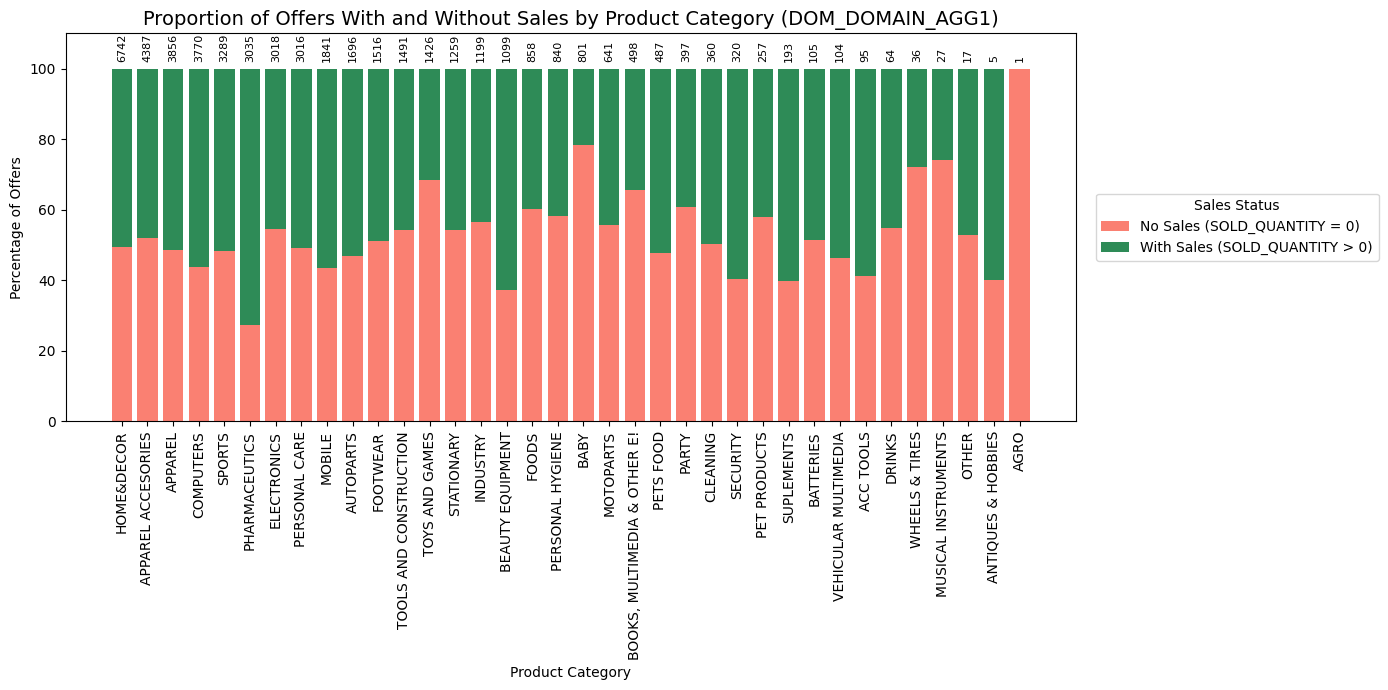

In [18]:
# Group by category and count the number of offers
category_stats = (
    ofertas.groupby("DOM_DOMAIN_AGG1")
    .agg(
        total_offers=("SOLD_QUANTITY", "count"),
        zero_sales_offers=("SOLD_QUANTITY", lambda x: (x == 0).sum()),
        positive_sales_offers=("SOLD_QUANTITY", lambda x: (x > 0).sum())
    )
    .reset_index()
)

# Calculate percentages
category_stats["pct_zero_sales"] = (category_stats["zero_sales_offers"] / category_stats["total_offers"]) * 100
category_stats["pct_positive_sales"] = (category_stats["positive_sales_offers"] / category_stats["total_offers"]) * 100

# Sort by total_offers descending
category_stats = category_stats.sort_values(by="total_offers", ascending=False)

# Display the result
import pandas as pd
from IPython.display import display
display(category_stats)

# Plotting the proportion of offers with and without sales by product category
# Sort the DataFrame by total number of offers in descending order
plot_df = category_stats.sort_values(by='total_offers', ascending=False).copy()

# Extract the data for plotting
categories = plot_df['DOM_DOMAIN_AGG1']
zero_sales_percent = plot_df['pct_zero_sales']
positive_sales_percent = plot_df['pct_positive_sales']
total_offer_counts = plot_df['total_offers']

# Create the figure
plt.figure(figsize=(14, 7))

# Plot the stacked bars
bars1 = plt.bar(
    categories, 
    zero_sales_percent, 
    label='No Sales (SOLD_QUANTITY = 0)', 
    color='salmon'
)

bars2 = plt.bar(
    categories, 
    positive_sales_percent, 
    bottom=zero_sales_percent, 
    label='With Sales (SOLD_QUANTITY > 0)', 
    color='seagreen'
)

# Add total offer count above each bar
for i, total in enumerate(total_offer_counts):
    plt.text(i, 102, str(total), ha='center', va='bottom', fontsize=8, rotation=90)

# Formatting the plot
plt.title('Proportion of Offers With and Without Sales by Product Category (DOM_DOMAIN_AGG1)', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Percentage of Offers')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Leave space above 100% for the text labels

# Move legend outside the plot
plt.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0,
    title='Sales Status'
)

plt.tight_layout()

# Display the chart
plt.show()



conversion   converted  not_converted  conversion_rate
DAY_OF_WEEK                                           
Wednesday         3600           3118         0.535874
Monday            3313           2994         0.525289
Thursday          3785           3501         0.519489
Tuesday           3711           3611         0.506829
Friday            3824           3949         0.491959
Sunday            2851           2983         0.488687
Saturday          3495           4011         0.465627


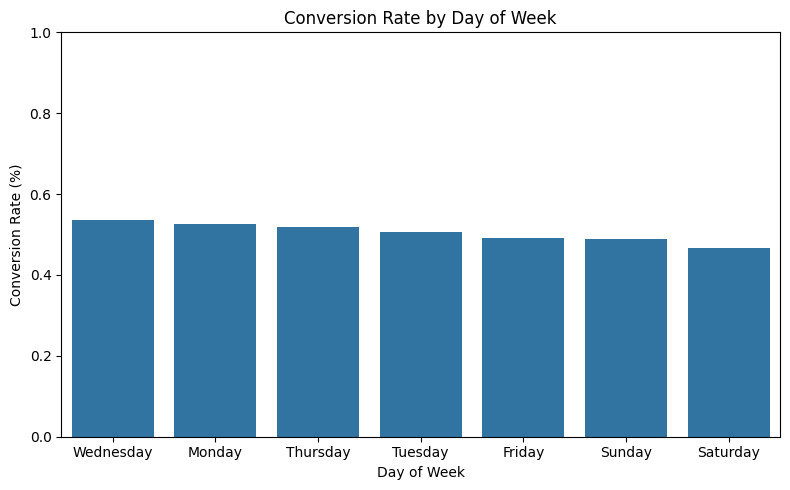

In [20]:
# Define conversion status: did the offer generate any sales?
ofertas['conversion'] = ofertas['SOLD_QUANTITY'].apply(lambda x: 'converted' if x > 0 else 'not_converted')

# Group by day of week and conversion status
conversion_by_day = (
    ofertas.groupby(['DAY_OF_WEEK', 'conversion'])
    .size()
    .unstack(fill_value=0)
)

# Calculate conversion rate = converted / total
conversion_by_day['total_offers'] = conversion_by_day.sum(axis=1)
conversion_by_day['conversion_rate'] = conversion_by_day['converted'] / conversion_by_day['total_offers']

# Sort by conversion rate
conversion_by_day_sorted = conversion_by_day.sort_values('conversion_rate', ascending=False)

# Display the result
print(conversion_by_day_sorted[['converted', 'not_converted', 'conversion_rate']])
# Plotting the conversion rate by day of week
plt.figure(figsize=(8, 5))
sns.barplot(
    x=conversion_by_day_sorted.index,
    y=conversion_by_day_sorted['conversion_rate']
)
plt.title('Conversion Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


## ✅ Strategic Recommendations

### 1. Optimize Inventory Allocation
Focus inventory and marketing efforts on categories with high sales conversion rates, such as `PHARMACEUTICS` and `SUPPLEMENTS`. These show strong demand signals.

### 2. Review Promotional Strategy for Low-Converting Categories
For categories like `BABY` and `TOYS`, investigate:
- Is the price point unattractive?
- Are the products seasonal or niche?
- Do customers see the offers but choose not to buy?

➡️ Consider reducing offer frequency or reallocating space unless product selection or pricing is revised.

### 3. Run A/B Tests on High-Volume Segments
`APPAREL` and `HOME&DECOR` have a large number of offers but modest success rates. Run controlled experiments to test:
- Discount depth
- Offer duration
- Product images/titles
- Offer on different weekdays

➡️ Goal: improve conversion without increasing the number of offers.

### 4. Implement a "Minimum Expected Conversion Rate" Policy
Establish a baseline: if a category has <40% of offers converting to sales over time, it should be reviewed or excluded from future campaigns unless justified.

---

## 📉 Cost Reduction Opportunity

By cutting or optimizing low-performing offer categories, the company could:
- Free up budget for more impactful campaigns
- Improve platform experience by showing users more relevant and popular products
- Increase ROI from marketing and logistics operations